In [1]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


**REQUIRED** **LIBRYERS**

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


Data Preprocessing 

In [3]:
Crime_data=pd.read_csv("crime_data.csv")

In [4]:
Crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
Crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**# Normalization function **

In [6]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

# Normalized data frame (considering the numerical part of data)

In [7]:
Crime_data_norm = norm_func(Crime_data.iloc[:,1:])
Crime_data_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-5.384582e-17,1.110223e-16,-4.118927e-16,8.326673e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.604405e+00,-1.509042e+00,-2.317136e+00,-1.487447e+00
25%,-8.524835e-01,-7.410815e-01,-7.627068e-01,-6.573508e-01
50%,-1.235217e-01,-1.411127e-01,3.177945e-02,-1.208577e-01
75%,7.948553e-01,9.388312e-01,8.435371e-01,5.277383e-01
max,2.206860e+00,1.994776e+00,1.758923e+00,2.644350e+00


# construction of Dendogram

In [8]:
import scipy.cluster.hierarchy as sch # for creating dendrogram 

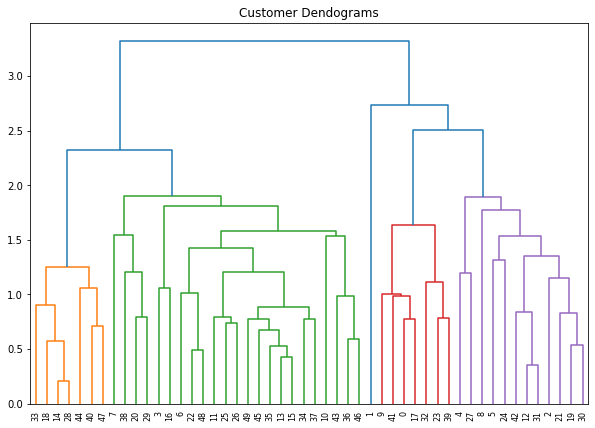

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = sch.dendrogram(sch.linkage(Crime_data_norm, method='average')) 

In [10]:
"""
Now we know the number of clusters for our dataset, 
the next step is to group the data points into these five clusters. 
To do so we will again use the AgglomerativeClustering
"""

'\nNow we know the number of clusters for our dataset, \nthe next step is to group the data points into these five clusters. \nTo do so we will again use the AgglomerativeClustering\n'

# Forming a group using clusters

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
Y = cluster.fit_predict(Crime_data_norm)

In [13]:
Crime_data['h_clusterid']=cluster.labels_
Crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3
